In [1]:
# Import Libraries and Dependencies 
import pandas as pd
import numpy as np 
import os
import json
from pathlib import Path
from datetime import datetime, timedelta
from tiingo import TiingoClient
%matplotlib inline

In [2]:
# Bring Env Variables into Python/Store in Variable
tiingo = os.getenv('TIINGO_API_KEY')

In [3]:
# Create a Client to Connect to Tiingo
client = TiingoClient()

In [4]:
# Create Start and End Dates for 1 Year's Worth of Historical Data
end = datetime.now()
start = end + timedelta(-365)

# Data Collection

### China Stock Information 

In [11]:
# Create DataFrames for China
china_ticker_df = client.get_dataframe(['ASHR','CQQQ', 'CHIE', 'CHIM', 'KURE', 'CHIS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')
china_df = china_ticker_df.rename(columns={'ASHR':'ASHR (China SH Composite)','CQQQ':'CQQQ (China Technology)', 'CHIE':'CHIE (China Energy)', 'CHIM':'CHIM (China Materials)', 'KURE':'KURE (China Healthcare)', 'CHIS':'CHIS (China Consumer Staples)'})
china_df.head()

,ASHR (China SH Composite),CQQQ (China Technology),CHIE (China Energy),CHIM (China Materials),KURE (China Healthcare),CHIS (China Consumer Staples)
date,,,,,,
2019-02-08 00:00:00+00:00,23.81,44.66,11.3900,15.9500,18.8522,16.0625
2019-02-11 00:00:00+00:00,24.45,45.21,11.4950,16.0050,19.3500,16.3634
2019-02-12 00:00:00+00:00,24.66,45.90,11.4900,15.9900,19.8750,16.4648
2019-02-13 00:00:00+00:00,25.16,46.17,11.6091,16.2909,20.1250,16.6352
2019-02-14 00:00:00+00:00,25.18,45.95,11.7400,16.2700,20.3500,16.7906


In [7]:
# Count/Drop Nulls (if any)
china_df.isnull().sum()

#china_df.dropna(inplace=True)
#china_df.isnull().sum()

ASHR                       0
CQQQ (Technology)          0
CHIE (Energy)              0
CHIM (Materials)           0
KURE (Healthcare)          0
CHIS (Consumer Staples)    0
dtype: int64

### US Stock Information

In [10]:
# Create DataFrames for US
us_ticker_df = client.get_dataframe(['SPY','IGM', 'IYE', 'IYM', 'IYH', 'IECS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')
us_df = us_ticker_df.rename(columns={'SPY':'SPY (USA SP500 Composite)', 'IGM':'IGM (USA Technology)', 'IYE':'IYE (USA Energy)', 'IYM':'IYM (USA Materials)', 'IYH':'IYH (USA Healthcare)', 'IECS':'IECS (USA Consumer Staples)'})
us_df.head()

,SPY (USA SP500 Composite),IGM (USA Technology),IYE (USA Energy),IYM (USA Materials),IYH (USA Healthcare),IECS (USA Consumer Staples)
date,,,,,,
2019-02-08 00:00:00+00:00,270.47,191.5262,34.20,87.58,189.21,24.6313
2019-02-11 00:00:00+00:00,270.62,191.8665,34.39,87.92,189.17,24.7325
2019-02-12 00:00:00+00:00,274.10,194.7900,34.83,89.89,191.66,24.9152
2019-02-13 00:00:00+00:00,274.99,194.8900,35.29,90.13,192.27,24.9484
2019-02-14 00:00:00+00:00,274.38,195.2700,35.39,89.47,192.67,24.6984


In [12]:
# Count/Drop Nulls (if any)
us_df.isnull().sum()

#usus_df.dropna(inplace=True)
#us_df.isnull().sum()

SPY (USA SP500 Composite)      0
IGM (USA Technology)           0
IYE (USA Energy)               0
IYM (USA Materials)            0
IYH (USA Healthcare)           0
IECS (USA Consumer Staples)    0
dtype: int64

# Monte Carlo Simulations ~1 year

### China Monte Carlo Simulation

In [14]:
# Calculate the Daily Returns for China Stocks
china_daily_returns = china_df.pct_change()
china_daily_returns.head()

,ASHR (China SH Composite),CQQQ (China Technology),CHIE (China Energy),CHIM (China Materials),KURE (China Healthcare),CHIS (China Consumer Staples)
date,,,,,,
2019-02-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-11 00:00:00+00:00,0.026879,0.012315,0.009219,0.003448,0.026405,0.018733
2019-02-12 00:00:00+00:00,0.008589,0.015262,-0.000435,-0.000937,0.027132,0.006197
2019-02-13 00:00:00+00:00,0.020276,0.005882,0.010366,0.018818,0.012579,0.010349
2019-02-14 00:00:00+00:00,0.000795,-0.004765,0.011276,-0.001283,0.011180,0.009342


In [15]:
# Calculate the Value of Average Daily Returns
##avg_daily_returns_ashr = china_daily_returns.mean()['ASHR (China SH Composite)']
avg_daily_returns_cqqq = china_daily_returns.mean()['CQQQ (China Technology)']
avg_daily_returns_chie = china_daily_returns.mean()['CHIE (China Energy)']
avg_daily_returns_chim = china_daily_returns.mean()['CHIM (China Materials)']
avg_daily_returns_kure = china_daily_returns.mean()['KURE (China Healthcare)']
avg_daily_returns_chis = china_daily_returns.mean()['CHIS (China Consumer Staples)']

# Calculate the Standard Deviation 
##std_daily_returns_ashr = china_daily_returns.std()['ASHR China SH Composite']
std_daily_returns_cqqq = china_daily_returns.std()['CQQQ (China Technology)']
std_daily_returns_chie = china_daily_returns.std()['CHIE (China Energy)']
std_daily_returns_chim = china_daily_returns.std()['CHIM (China Materials)']
std_daily_returns_kure = china_daily_returns.std()['KURE (China Healthcare)']
std_daily_returns_chis = china_daily_returns.std()['CHIS (China Consumer Staples)']

# Save the Last Day's Closing Price
##ashr_last_price = china_df['ASHR China SH Composite'][-1]
cqqq_last_price = china_df['CQQQ (China Technology)'][-1]
chie_last_price = china_df['CHIE (China Energy)'][-1]
chim_last_price = china_df['CHIM (China Materials)'][-1]
kure_last_price = china_df['KURE (China Healthcare)'][-1]
chis_last_price = china_df['CHIS (China Consumer Staples)'][-1]

In [16]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [17]:
# Run the Monte Carlo Simulation
for x in range (number_simulations):
    ##simulated_ashr_prices = [ashr_last_price]
    simulated_cqqq_prices = [cqqq_last_price]
    simulated_chie_prices = [chie_last_price]
    simulated_chim_prices = [chim_last_price]
    simulated_kure_prices = [kure_last_price]
    simulated_chis_prices = [chis_last_price]
    
    for y in range (number_records):
        ##simulated_ashr_price = simulated_ashr_prices[-1] * (1 + np.random.normal(avg_daily_returns_ashr, std_daily_returns_ashr))
        simulated_cqqq_price = simulated_cqqq_prices[-1] * (1 + np.random.normal(avg_daily_returns_cqqq, std_daily_returns_cqqq))
        simulated_chie_price = simulated_chie_prices[-1] * (1 + np.random.normal(avg_daily_returns_chie, std_daily_returns_chie))
        simulated_chim_price = simulated_chim_prices[-1] * (1 + np.random.normal(avg_daily_returns_chim, std_daily_returns_chim))
        simulated_kure_price = simulated_kure_prices[-1] * (1 + np.random.normal(avg_daily_returns_kure, std_daily_returns_kure))
        simulated_chis_price = simulated_chis_prices[-1] * (1 + np.random.normal(avg_daily_returns_chis, std_daily_returns_chis))
       
        ##simulated_ashr_prices.append(simulated_ashr_price)
        simulated_cqqq_prices.append(simulated_cqqq_price)
        simulated_chie_prices.append(simulated_chie_price)
        simulated_chim_prices.append(simulated_chim_price)
        simulated_kure_prices.append(simulated_kure_price)
        simulated_chis_prices.append(simulated_chis_price)
    
    ##monte_carlo['ASHR China SH Composite prices'] = pd.Series(simulated_ashr_prices)
    monte_carlo['CQQQ (China Technology) prices'] = pd.Series(simulated_cqqq_prices)
    monte_carlo['CHIE (China Energy) prices'] = pd.Series(simulated_chie_prices)
    monte_carlo['CHIM (China Materials) prices'] = pd.Series(simulated_chim_prices)
    monte_carlo['KURE (China Healthcare) prices'] = pd.Series(simulated_kure_prices)
    monte_carlo['CHIS (China Consumer Staples) prices'] = pd.Series(simulated_chis_prices)
    
    simulated_china_daily_returns = monte_carlo.pct_change()
    
    weights = [0.2, 0.2, 0.2, 0.2, 0.2]
    china_portfolio_daily_returns = simulated_china_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[x] = (1 + china_portfolio_daily_returns.fillna(0)).cumprod() - 1
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.004160,-0.002149,-0.004293,-0.001442,-0.008019,0.003221,0.007091,0.007316,0.001918,-0.002688,...,0.013082,0.003279,0.009971,0.003897,-0.007155,-0.007631,0.003825,-0.001222,0.002418,0.001396
2,0.000450,0.003824,0.000157,-0.001860,-0.008149,0.002982,0.008841,0.010916,0.000449,-0.017111,...,0.023404,0.004310,0.004918,0.009219,0.003084,-0.013665,0.000519,-0.003970,-0.010151,-0.003663
3,-0.007344,0.005291,0.000257,-0.002010,0.001974,0.001916,0.016384,0.006246,0.005571,-0.010724,...,0.013459,0.015223,0.007640,0.012486,-0.001055,-0.011109,0.008811,0.001250,-0.013364,0.002318
4,0.002760,-0.002375,-0.004474,-0.010254,0.006677,-0.007792,0.025823,0.011813,0.004199,-0.022548,...,0.029789,0.012624,0.004423,0.011363,-0.000929,-0.018391,0.008563,-0.000202,-0.009203,0.003708


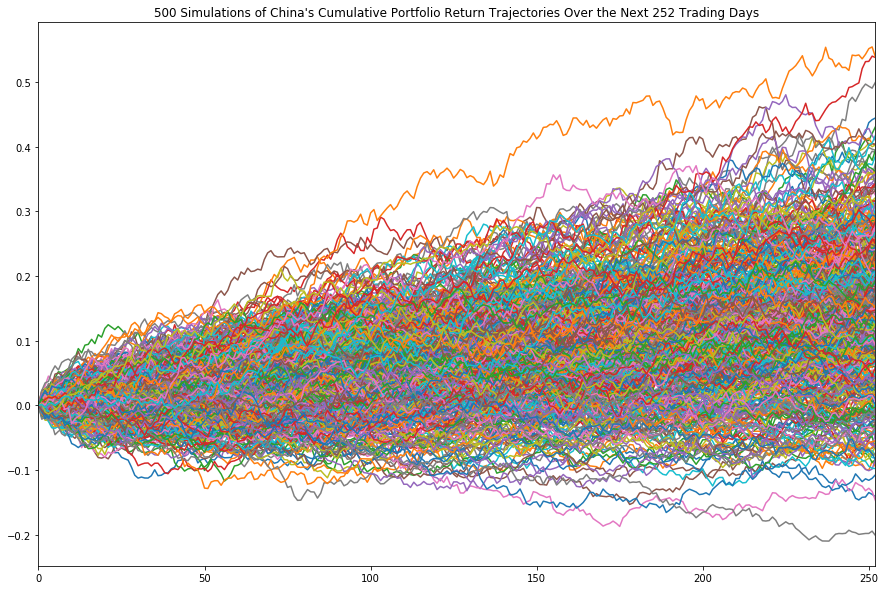

In [18]:
# Visualize the Simulation
plot_title = f"{number_simulations} Simulations of China's Cumulative Portfolio Return Trajectories Over the Next {number_records} Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize=(15,10))

### US Monte Carlo Simulation 

In [21]:
# Calculate the Daily Returns for China Stocks
us_daily_returns = us_df.pct_change()
us_daily_returns.head()

,SPY (USA SP500 Composite),IGM (USA Technology),IYE (USA Energy),IYM (USA Materials),IYH (USA Healthcare),IECS (USA Consumer Staples)
date,,,,,,
2019-02-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-11 00:00:00+00:00,0.000555,0.001777,0.005556,0.003882,-0.000211,0.004109
2019-02-12 00:00:00+00:00,0.012859,0.015237,0.012794,0.022407,0.013163,0.007387
2019-02-13 00:00:00+00:00,0.003247,0.000513,0.013207,0.002670,0.003183,0.001333
2019-02-14 00:00:00+00:00,-0.002218,0.001950,0.002834,-0.007323,0.002080,-0.010021


In [22]:
# Calculate the Value of Average Daily Returns
#avg_daily_returns_spy = us_daily_returns.mean()['SPY (USA SP500 Composite)']
avg_daily_returns_igm = us_daily_returns.mean()['IGM (USA Technology)']
avg_daily_returns_iye = us_daily_returns.mean()['IYE (USA Energy)']
avg_daily_returns_iym = us_daily_returns.mean()['IYM (USA Materials)']
avg_daily_returns_iyh = us_daily_returns.mean()['IYH (USA Healthcare)']
avg_daily_returns_iecs = us_daily_returns.mean()['IECS (USA Consumer Staples)']

# Calculate the Standard Deviation 
#std_daily_returns_spy = us_daily_returns.std()['SPY (USA SP500 Composite)']
std_daily_returns_igm = us_daily_returns.std()['IGM (USA Technology)']
std_daily_returns_iye = us_daily_returns.std()['IYE (USA Energy)']
std_daily_returns_iym = us_daily_returns.std()['IYM (USA Materials)']
std_daily_returns_iyh = us_daily_returns.std()['IYH (USA Healthcare)']
std_daily_returns_iecs = us_daily_returns.std()['IECS (USA Consumer Staples)']

# Save the Last Day's Closing Price
#spy_last_price = us_df['SPY (USA SP500 Composite)'][-1]
igm_last_price = us_df['IGM (USA Technology)'][-1]
iye_last_price = us_df['IYE (USA Energy)'][-1]
iym_last_price = us_df['IYM (USA Materials)'][-1]
iyh_last_price = us_df['IYH (USA Healthcare)'][-1]
iecs_last_price = us_df['IECS (USA Consumer Staples)'][-1]

In [23]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [24]:
# Run the Monte Carlo Simulation
for x in range (number_simulations):
    #simulated_spy_prices = [spy_last_price]
    simulated_igm_prices = [igm_last_price]
    simulated_iye_prices = [iye_last_price]
    simulated_iym_prices = [iym_last_price]
    simulated_iyh_prices = [iyh_last_price]
    simulated_iecs_prices = [iecs_last_price]
    
    for y in range (number_records):
        #simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_returns_spy, std_daily_returns_spy))
        simulated_igm_price = simulated_igm_prices[-1] * (1 + np.random.normal(avg_daily_returns_igm, std_daily_returns_igm))
        simulated_iye_price = simulated_iye_prices[-1] * (1 + np.random.normal(avg_daily_returns_iye, std_daily_returns_iye))
        simulated_iym_price = simulated_iym_prices[-1] * (1 + np.random.normal(avg_daily_returns_iym, std_daily_returns_iym))
        simulated_iyh_price = simulated_iyh_prices[-1] * (1 + np.random.normal(avg_daily_returns_iyh, std_daily_returns_iyh))
        simulated_iecs_price = simulated_iecs_prices[-1] * (1 + np.random.normal(avg_daily_returns_iecs, std_daily_returns_iecs))
       
        #simulated_spy_prices.append(simulated_spy_price)
        simulated_igm_prices.append(simulated_igm_price)
        simulated_iye_prices.append(simulated_iye_price)
        simulated_iym_prices.append(simulated_iym_price)
        simulated_iyh_prices.append(simulated_iyh_price)
        simulated_iecs_prices.append(simulated_iecs_price)
    
    #monte_carlo['SPY (USA SP500 Composite) prices'] = pd.Series(simulated_spy_prices)
    monte_carlo['IGM (USA Technology) prices'] = pd.Series(simulated_igm_prices)
    monte_carlo['IYE (USA Energy) prices'] = pd.Series(simulated_iye_prices)
    monte_carlo['IYM (USA Materials) prices'] = pd.Series(simulated_iym_prices)
    monte_carlo['IYH (USA Healthcare) prices'] = pd.Series(simulated_iyh_prices)
    monte_carlo['IECS (USA Consumer Staples) prices'] = pd.Series(simulated_iecs_prices)
    
    simulated_us_daily_returns = monte_carlo.pct_change()
    
    weights = [0.2, 0.2, 0.2, 0.2, 0.2]
    us_portfolio_daily_returns = simulated_us_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[x] = (1 + us_portfolio_daily_returns.fillna(0)).cumprod() - 1
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.004835,0.000726,-0.001307,-0.002006,-0.006678,-0.000643,0.006931,-0.002534,0.006889,-0.002278,...,-0.001375,-0.004061,0.003188,0.004283,0.001804,-0.001281,-0.000081,0.001890,0.002287,-0.003137
2,-0.000069,-0.004533,-0.001921,-0.002837,-0.008982,-0.008583,0.007871,0.007377,0.001175,-0.005044,...,-0.001567,-0.000707,0.013241,0.001803,0.006965,0.001022,0.001999,0.006369,0.001815,-0.005006
3,-0.003616,0.000006,-0.002089,0.002553,-0.009278,-0.011167,0.004980,0.007027,0.003319,-0.003960,...,-0.004493,0.002337,0.016308,0.006315,0.013657,-0.004281,0.003603,0.008555,-0.003203,-0.003932
4,-0.000856,0.000345,-0.006762,-0.000886,-0.005064,-0.014452,0.012307,0.011011,-0.000392,-0.007290,...,0.002460,0.002246,0.007521,0.005644,0.016177,-0.002651,0.003739,-0.003941,-0.003509,-0.011601


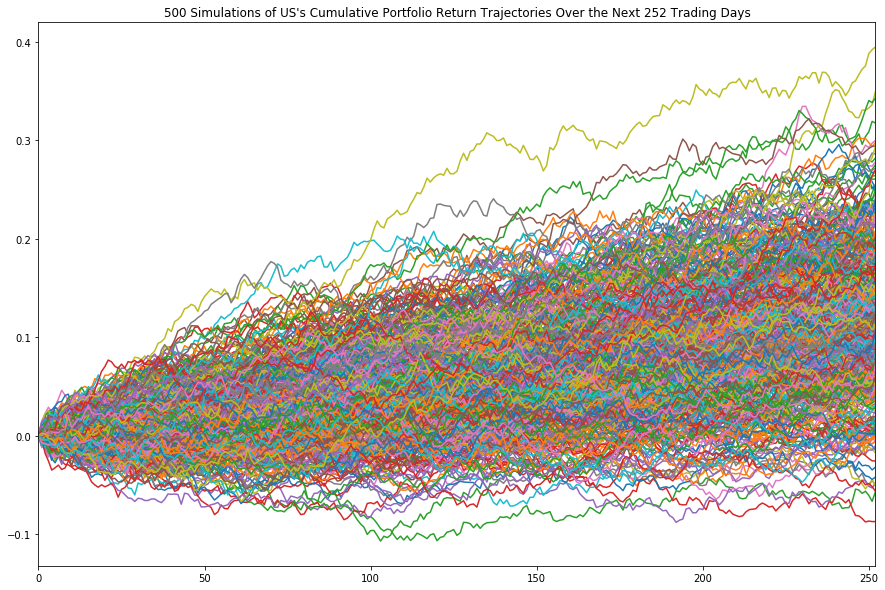

In [25]:
# Visualize the Simulation
plot_title = f"{number_simulations} Simulations of US's Cumulative Portfolio Return Trajectories Over the Next {number_records} Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize=(15,10))